# Perceptron

In [1]:
import numpy as np

In [15]:
import numpy as np

class Perceptron(object):
  """ Perceptron
  Parameters
  ------------
  eta: float
    Learning rate (0.0 < eta < 1.0)
  n_iter: int
    Number or iteration over the training set
  random_state: int
    Random number generator seed for weight initalization

  Attributes
  ------------
  w_ : 1d_array
    Weights after fitting
  errors_ : list
    Number of misclassifications (updates) in each epoch
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ Fit training data
    Parameters
    ------------
    X : {np.array}, shape = [n_samples, m_features]
      Training vectors with n_samples samples and m_features features
    y : {np.array}, shape = [n_samples]
      Target values
    """
    #incializacion de los pesos
    rgen = np.random.RandomState(self.random_state)
    if self.random_state is None:
      self.w_= np.zeros(1 + len(X[1]))
    else:
      self.w_= rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1]) #.shape me da las columnas de x
    self.errors_ = []

    #Algoritmo de clasificacion   
    for _ in range(self.n_iter):
      errors = 0
      for xi, yi in zip(X, y):#zip pega vestores por columna
        update = self.eta * (yi - self.predict(xi))
        self.w_[1:] += update * xi #+= toma  los valores de antes y le suma a los adquiridos
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """Calculate cell input"""
    return np.dot(X, self.w_[1:]) + self.w_[0] #producto punto del vector de entratadas contra los pesos

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1) # si se cumple da 1 si no da -1

In [18]:
# Función para graficar
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = np.array(['lime', 'red', 'blue'])
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Superficies de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Conjuntos de cada clase
    plt.scatter(X[:,0],
                X[:,1],
                alpha=0.9,
                c=colors[y],
                edgecolor='black',)

In [19]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

ppn = Perceptron(n_iter=20, eta=0.85)
ppn.fit(X, y)
print('Pesos: %s' % ppn.w_)

Pesos: [-1.68375655  1.69388244  1.69471828]


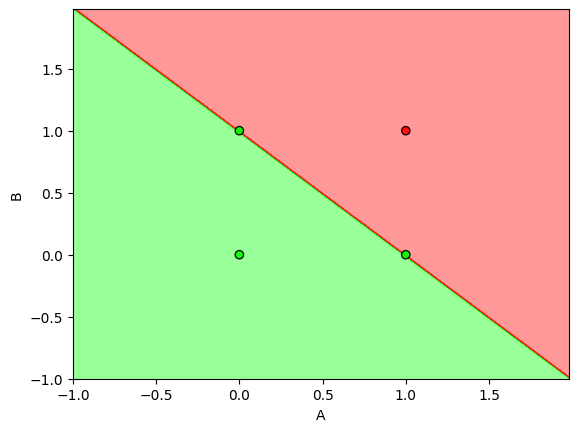

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('A')
plt.ylabel('B')
plt.show()

Conjunto de datos Irirs

In [21]:
import pandas as pd
df = pd.read_csv('https://bit.ly/38XWXS4', header=None) #Heaader = none , para que no tenga encabezado
df.tail(2)

,0,1,2,3,4
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<Axes: xlabel='4', ylabel='Count'>

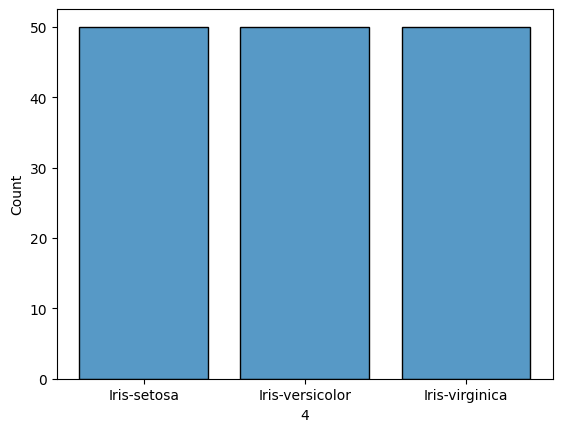

In [24]:
import seaborn as sns
sns.histplot(x = df[4], shrink= 0.8)

In [25]:
df.iloc[:,4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
X = df.iloc[0:100, [0,2]].values #values para que tome los valores y no toda la lista como un solo valor
y = df. iloc[0:100, 4].values #Etiquetas en texto
y = np.array(np.where(y=='Iris-setosa', -1, 1))
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## EDA (Analisis exploratorio de Datos)

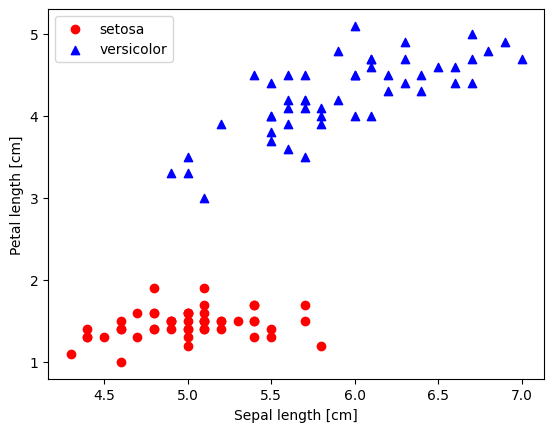

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='^', label='versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

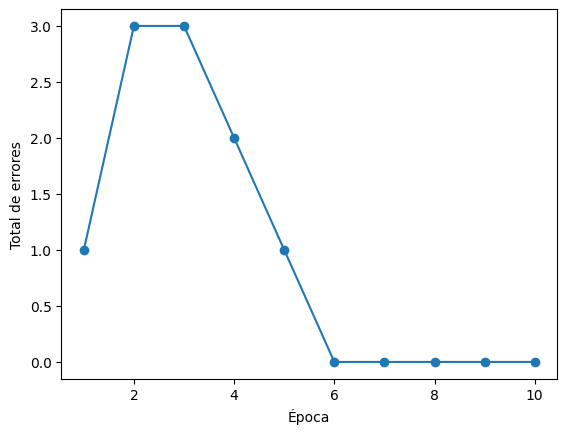

<class 'numpy.ndarray'>


In [28]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Época')
plt.ylabel('Total de errores')
plt.show()
print(type(y))

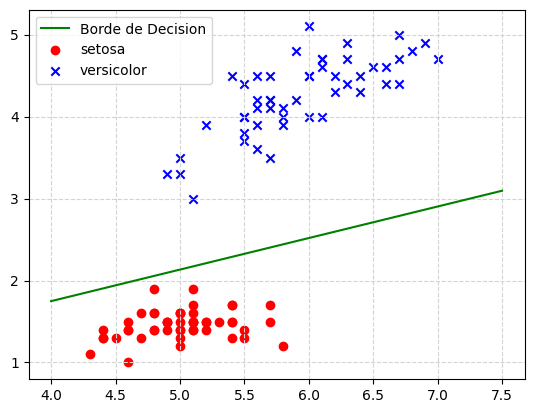

In [29]:
# w0 + w1*x1 + w2*x2
# => x2 = -(w0 + w1*x1) / w2
# Borde de decision
x1 = np.linspace(4, 7.5, 2)
x2 = - (ppn.w_[0]+ppn.w_[1]*x1) / ppn.w_[2]
plt.plot(x1, x2, 'g', label = "Borde de Decision")

# Clase -1 : setosa
registros = y == -1
x1 = X[registros][:, 0]
x2 = X[registros][:, 1]
plt.scatter(x1, x2, c='r', marker='o', label="setosa")
# Clase 1 : versicolor
registros = y == 1
x1 = X[registros][:, 0]
x2 = X[registros][:, 1]
plt.scatter(x1, x2, c='b', marker='x', label="versicolor")

plt.legend()
plt.grid(color = 'lightgray', linestyle = '--')

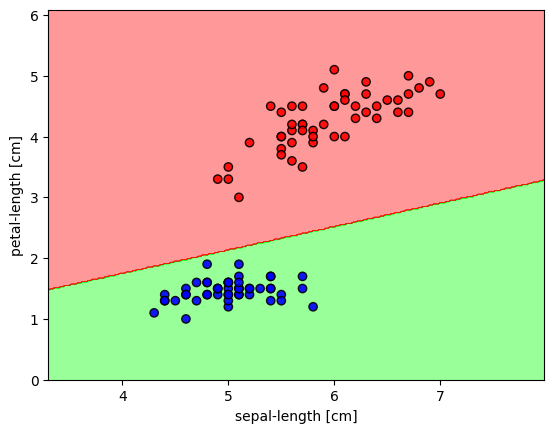

In [30]:
plot_decision_regions(X, y, classifier=ppn)#, resolution=2)
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.show()

## SciKitlearn 

In [33]:
from sklearn import datasets 
import numpy as np  

In [34]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
X = iris.data[:,[2,3]]
y = iris.target[:] # se crea una copia , mas no se modifica

In [36]:
# Separar el conjunto de datos en entrenamiento y pruebas
from sklearn.model_selection import train_test_split #divide los datos en entrenamiento y pruebas
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,# test_size para tomar la cantidad de prueba

                                                 random_state=1, stratify=y)# random_state es el inicializar de nuemprs aleatorios y nos asegura tener siempre el mismo resulatado, es como una semilla
#Stratificacion es para que los se tomen la misma cantidad sobre cada una de las muestras y no en conjunto, si no lo ponemos se puede sesgar la prediccion
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [37]:
print("Etiquetas en y      :",np.bincount(y))
print("Etiquetas en y_train:",np.bincount(y_train))
print("Etiquetas en y_test :",np.bincount(y_test))

Etiquetas en y      : [50 50 50]
Etiquetas en y_train: [35 35 35]
Etiquetas en y_test : [15 15 15]


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #se recomienda escalar los datos , para los datos atipicos
sc.fit(X_train)# se ajuste a la x de entrenamiento , aprende la media y la desviacion estandanar
X_train_std = sc.transform(X_train) # Le aplica la media a los datpos de entrenamiento
X_test_std = sc.transform(X_test) # aplica a los de prueba, pero cuando lleguen nuevos datos se entrenat splo con los de entrenamiento mas no con los de prueba prueba solo se usa para tratar de predecir

In [39]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=100,eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [40]:
y_pred = ppn.predict(X_test_std) #y_hat
print('Errores de clasificacion: ', (y_test-y_pred).sum())

Errores de clasificacion:  1


In [41]:
ppn.coef_

array([[-0.10655204, -0.11836728],
       [ 0.31790327, -0.3670884 ],
       [ 0.36018414,  0.30003858]])

In [42]:
print('Exactitud:' , ppn.score(X_test_std,y_test))

Exactitud: 0.9777777777777777


In [43]:
from sklearn.metrics import accuracy_score
print('Exactitud:', accuracy_score(y_test,y_pred))

Exactitud: 0.9777777777777777


In [46]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

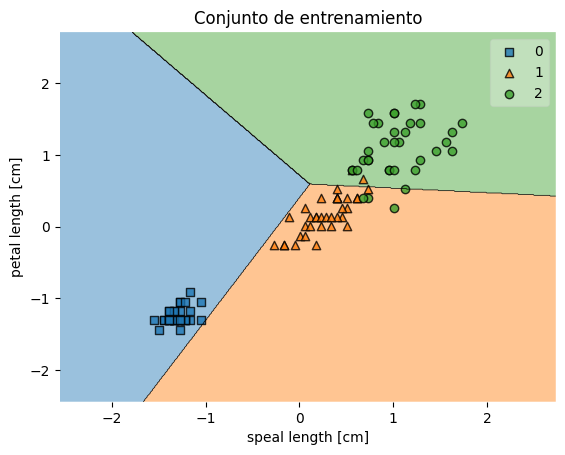

In [47]:
plot_decision_regions(X_train_std,y_train,clf=ppn)
plt.xlabel('speal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Conjunto de entrenamiento')
plt.show()

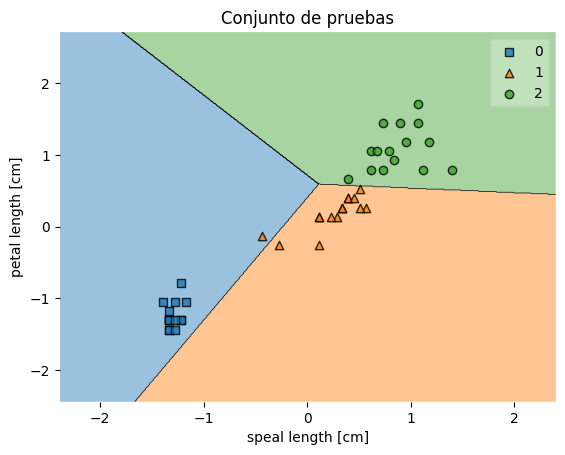

In [48]:
plot_decision_regions(X_test_std,y_test,clf=ppn)
plt.xlabel('speal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Conjunto de pruebas')
plt.show()

# Sigmoide 

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def sigmoide(z):
  return 1.0/(1+np.exp(-z))

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_10612\4253125155.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi (z)$')


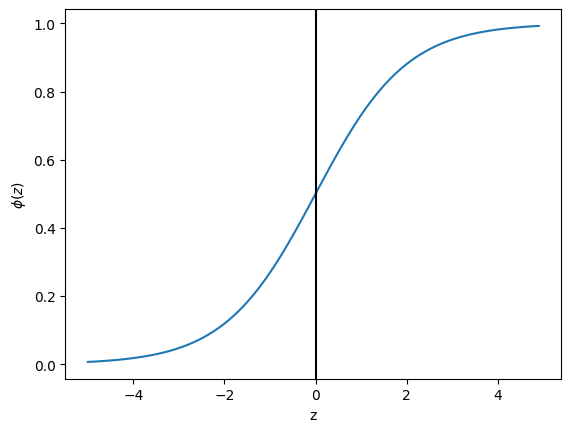

In [51]:
z = np.arange(-5,5,0.1)
phi_z = sigmoide(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k') #agerga linea vertical
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,random_state=1)

In [53]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=100.0, random_state=1)

In [54]:
y_hat = lr.predict(X_test_std)
print('Errores:', (y_test-y_hat).sum())
print('Exactitud:', lr.score(X_test_std,y_test))

Errores: 1
Exactitud: 0.9777777777777777


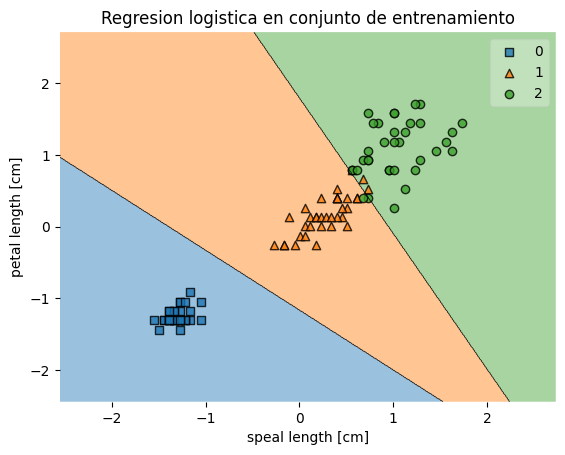

In [55]:
plot_decision_regions(X_train_std,y_train, clf = lr)
plt.xlabel('speal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Regresion logistica en conjunto de entrenamiento')
plt.show()

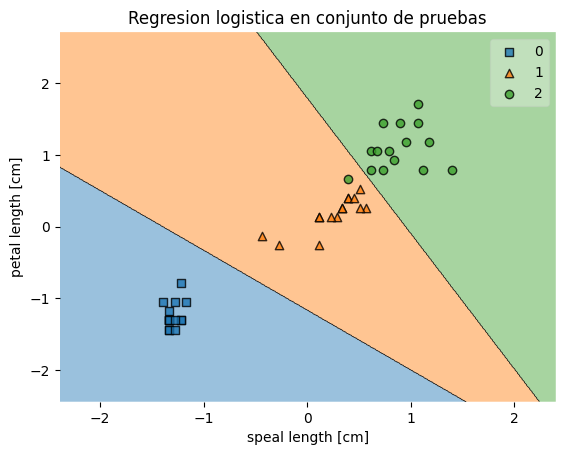

In [56]:
plot_decision_regions(X_test_std,y_test, clf = lr)
plt.xlabel('speal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Regresion logistica en conjunto de pruebas')
plt.show()

# Support Vectors Machines 

In [57]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [58]:
iris = datasets.load_iris()
X = iris.data[:,[0,2]]
y = iris.target

In [59]:
svm = SVC(C=0.5,kernel='linear')
svm.fit(X,y)

SVC(C=0.5, kernel='linear')

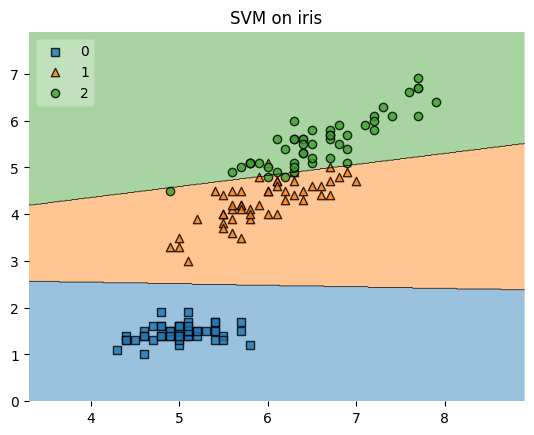

In [60]:
plot_decision_regions(X,y,clf=svm,legend=2)
plt.title('SVM on iris')
plt.show()